
## Agents AI but for images 

* https://huggingface.co/settings/tokens
* python 3.9 


In [1]:

import os


In [2]:

'''

export OPENAI_API_KEY="your_api_key_here"

restart "jupyter notebook" 

echo $OPENAI_API_KEY

openai.api_key = os.getenv("OPENAI_API_KEY")

## print( os.getenv('HF_TOKEN') )

os.environ['HF_TOKEN'] =  os.getenv('HF_TOKEN')


'''


'\n\nexport OPENAI_API_KEY="your_api_key_here"\n\nrestart "jupyter notebook" \n\necho $OPENAI_API_KEY\n\nopenai.api_key = os.getenv("OPENAI_API_KEY")\n\n## print( os.getenv(\'HF_TOKEN\') )\n\nos.environ[\'HF_TOKEN\'] =  os.getenv(\'HF_TOKEN\')\n\n\n'

In [3]:

## print( os.getenv('HF_TOKEN') )


In [4]:

## pip install --upgrade smolagents


In [5]:

from smolagents import Tool


In [6]:

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

x = image_generation_tool("A sunny beach")


Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


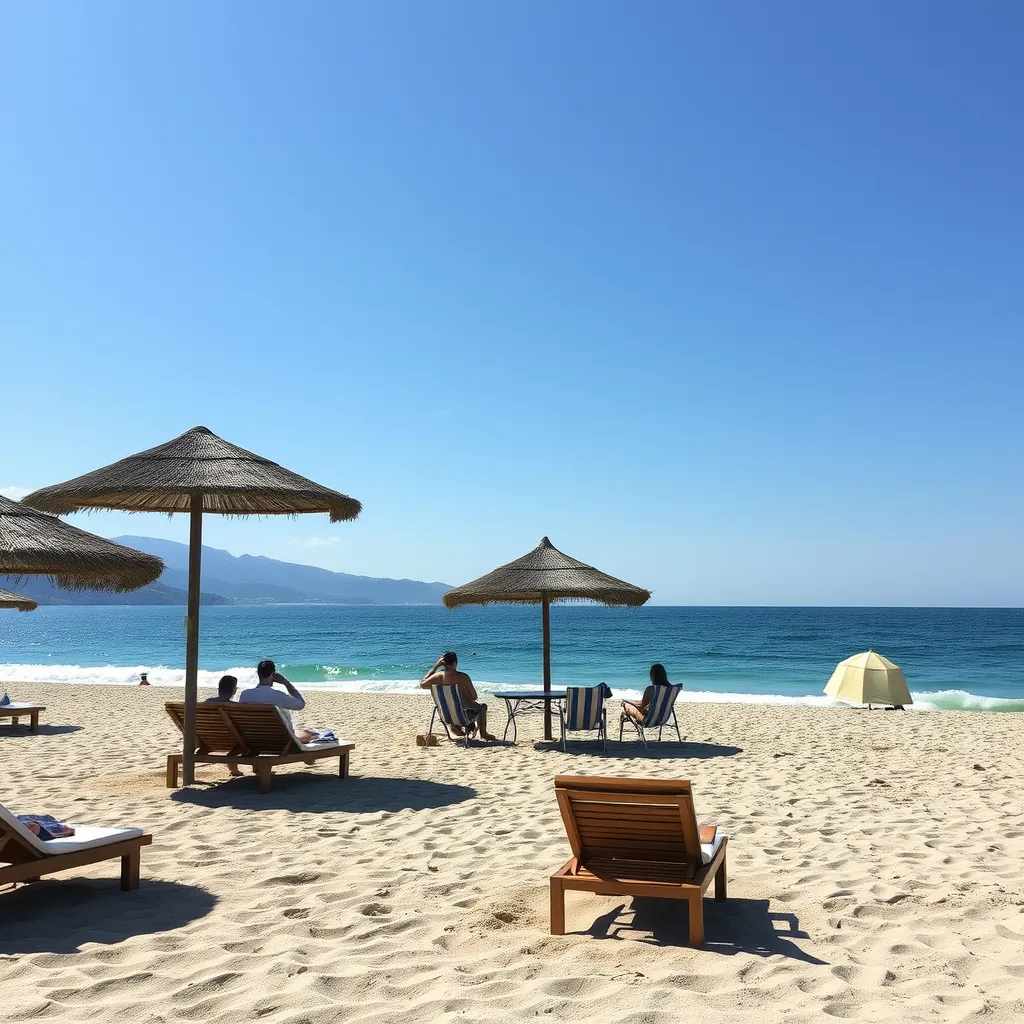

In [7]:
from urllib.request import urlretrieve

from PIL import Image

background = Image.open(x)
background


In [8]:

from smolagents import CodeAgent, HfApiModel

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")
agent = CodeAgent(tools=[image_generation_tool], model=model)

ff = agent.run(
    " 'Improve this prompt, then generate an image of it.', prompt='A rabbit wearing a space suit' "
)

ff


/Users/user/opt/anaconda3/envs/py310_agentsAI/lib/python3.10/site-packages/smolagents/models.py:1372: FutureWarning: HfApiModel was renamed to InferenceClientModel in version 1.14.0 and will be removed in 1.17.0.
  warnings.warn(


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ 'Improve this prompt, then generate an image of it.', prompt='A rabbit wearing a space suit'                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A quirky white rabbit, with a playful and curious expression, wearing a sleek black space     
  suit complete with a helmet, floating in a simulated space environment with stars and a planet visible in the    
  background."                                                                                                     
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A quirky white rabbit, with a playful and curious expression, wearing a sleek black space suit complete with a 
helmet, floating in a simulated space environment with stars and a planet visible in the background.

Out: None

[Step 1: Duration 6.73 seconds| Input tokens: 2,037 | Output tokens: 126]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Generating the image                                                                                           
  image = image_generator(improved_prompt)                                                                         
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/gradio/1cb484603d6e1e872ab22d6671e76f0e57f42772a8ab6c6a5d7
10d735b46f340/image.webp

[Step 2: Duration 5.73 seconds| Input tokens: 4,352 | Output tokens: 182]

'/private/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/gradio/1cb484603d6e1e872ab22d6671e76f0e57f42772a8ab6c6a5d710d735b46f340/image.webp'

In [9]:

ff


'/private/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/gradio/1cb484603d6e1e872ab22d6671e76f0e57f42772a8ab6c6a5d710d735b46f340/image.webp'

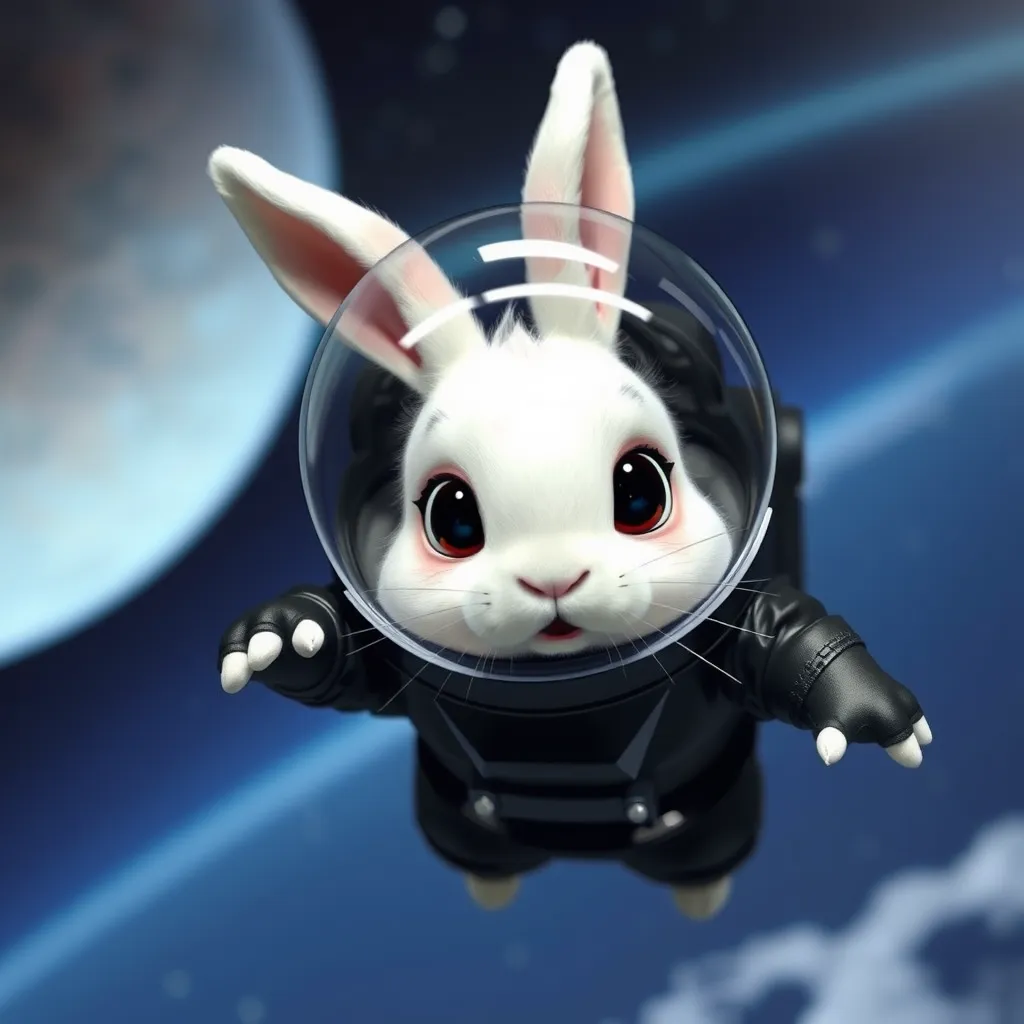

In [10]:

from urllib.request import urlretrieve

from PIL import Image

background = Image.open(ff)
background
